In [3]:
import os
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter, convolve1d
from skimage.io import imread, imsave
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, erosion, dilation
from skimage.color import label2rgb
from skimage import img_as_uint
from skimage.feature import blob_dog
from mpl_toolkits.mplot3d import Axes3D
import glob

## We will be using image processing techniques and the skimage package to determine whether or not an ionic liquid - solvent mixture is phase separated

## The first step will be to convolve the image.  This process smooths out some of the shadowing from the VMD-rendered image

In [5]:
def _convolveImage(image, kernel):
    def scaleIt(cvld):
        cvld[cvld > 255.0] = 255.0
        cvld[cvld < 0.0] = 0.0
        return cvld
    convolved = np.ones(image.shape)
    for i in range(convolved.shape[-1]):
        cvld = convolve2d(image[:,:,i], kernel, boundary='fill', mode='same',
                          fillvalue=0.)
        convolved[:,:,i] = scaleIt(cvld)

    #plt.imshow(convolved.astype(int))
    return convolved.astype(int)

## Next we will threshold a gray-scale image via Otsu's method

In [6]:
def _apply_otsu(gray):
    thresh_otsu = threshold_otsu(gray)
    im_bw = gray < thresh_otsu
    
    return im_bw

### In some image processing tutorial, the borders are cleared so that objects near the border aren't counted.  I am skipping this step so that in theory I can still count these objects.

### To clean up the image, I am going to play around with a cutoff to delete objects that may be either noise or a single atom, which we don't want to count towards total objects.  A filtered image as well as the image properties will be passed into `_cutoff_particles`

In [7]:
def _cutoff_particles(image, image_props, cutoff=300):
    im_bw_filt = image > 1
    
    # Loop through image properties and delete small objects
    n_regions = 0
    for prop in im_props:
        if prop.area < cutoff:
            im_bw_filt[image==prop.label] == False
        else:
            n_regions += 1
            
    print('Number of individual regions = {}'.format(n_regions))
    
    return n_regions

### Now we will loop through our images and see how our image processing workflow performs

In [8]:
"""hetero_list = list()
sigma = 8
unsharp_strength = 0.8
kernel_size = 10
kernel = np.ones((kernel_size, kernel_size)) / kernel_size
kernel[0,:]
for filepath in glob.iglob('/Users/raymatsumoto/science/keras-phase-sep/data/train-images/hetero/*.png'):
    image = imread(filepath)
    blurred = gaussian_filter(image, sigma=0.8)
    convolved = _convolveImage(image - unsharp_strength * blurred, kernel)
    gray = convolved[:,:,0]
    im_bw = _apply_otsu(gray)
    im_labeled, n_labels = label(im_bw, background=0, return_num=True)
    im_labeled += 1
    
    im_props = regionprops(im_labeled)
    n_regions = _cutoff_particles(im_labeled, im_props, cutoff=150)
    hetero_list.append(n_regions)"""

"hetero_list = list()\nsigma = 8\nunsharp_strength = 0.8\nkernel_size = 10\nkernel = np.ones((kernel_size, kernel_size)) / kernel_size\nkernel[0,:]\nfor filepath in glob.iglob('/Users/raymatsumoto/science/keras-phase-sep/data/train-images/hetero/*.png'):\n    image = imread(filepath)\n    blurred = gaussian_filter(image, sigma=0.8)\n    convolved = _convolveImage(image - unsharp_strength * blurred, kernel)\n    gray = convolved[:,:,0]\n    im_bw = _apply_otsu(gray)\n    im_labeled, n_labels = label(im_bw, background=0, return_num=True)\n    im_labeled += 1\n    \n    im_props = regionprops(im_labeled)\n    n_regions = _cutoff_particles(im_labeled, im_props, cutoff=150)\n    hetero_list.append(n_regions)"

In [9]:
"""homo_list = list()
sigma = 8
unsharp_strength = 0.8
kernel_size = 10
kernel = np.ones((kernel_size, kernel_size)) / kernel_size
kernel[0,:]
for filepath in glob.iglob('/Users/raymatsumoto/science/keras-phase-sep/data-otsu/train/homo/*.png'):
    print(filepath)
    image = imread(filepath)
    im_labeled, n_labels = label(image, background=0, return_num=True)
    im_labeled += 1
    
    im_props = regionprops(im_labeled)
    n_regions = _cutoff_particles(im_labeled, im_props, cutoff=150)
    homo_list.append(n_regions)"""

"homo_list = list()\nsigma = 8\nunsharp_strength = 0.8\nkernel_size = 10\nkernel = np.ones((kernel_size, kernel_size)) / kernel_size\nkernel[0,:]\nfor filepath in glob.iglob('/Users/raymatsumoto/science/keras-phase-sep/data-otsu/train/homo/*.png'):\n    print(filepath)\n    image = imread(filepath)\n    im_labeled, n_labels = label(image, background=0, return_num=True)\n    im_labeled += 1\n    \n    im_props = regionprops(im_labeled)\n    n_regions = _cutoff_particles(im_labeled, im_props, cutoff=150)\n    homo_list.append(n_regions)"

## Experiment with k-means clustering for colors

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

In [9]:
n_colors = 3
image = np.array(image, dtype=np.float64) / 255
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image_array, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)

NameError: name 'image' is not defined

In [10]:
labels=kmeans.predict(image_array)

NameError: name 'kmeans' is not defined

In [10]:
img = 'data/train/homo/0f19f16fc5cbd07025c80a51a30683e6-1.png'

In [14]:
image = cv2.imread(img)

In [17]:
len(image)

1000

/Users/raymatsumoto/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


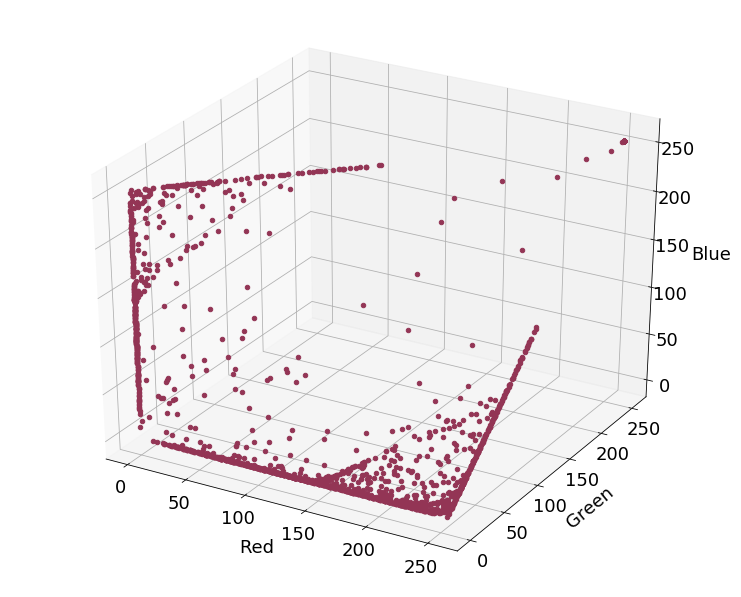

[[147  53  85]]


In [75]:
import cv2
from sklearn.cluster import KMeans
from skimage.transform import resize

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters, filename):
        self.CLUSTERS = clusters
        self.IMAGE = image
        self.FILE = filename
        
    def dominantColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        img = cv2.resize(img, dsize=(50, 50), interpolation=cv2.INTER_CUBIC)
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                
        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
    
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
        
    def plotClusters(self):
        #plotting 
        fig = plt.figure(figsize=(10,8))
        ax = Axes3D(fig)       
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(pix[0], pix[1], pix[2], color = self.rgb_to_hex(self.COLORS[label]))
        ax.set_xlabel('Red', fontsize=18, labelpad=13)
        ax.set_ylabel('Green', fontsize=18, labelpad=13)
        ax.set_zlabel('Blue', fontsize=18, labelpad=16)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
        plt.tight_layout()
        plt.savefig(self.FILE)
        plt.show()

   
img = 'data/train/homo/0f19f16fc5cbd07025c80a51a30683e6-1.png'
#img = 'data/train/homo/007364fd56b31f36321ad4c0e64281bb-1.png'
clusters = 1
dc = DominantColors(img, clusters, 'red.pdf') 
colors = dc.dominantColors()
dc.plotClusters()
print(colors)

/Users/raymatsumoto/.local/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


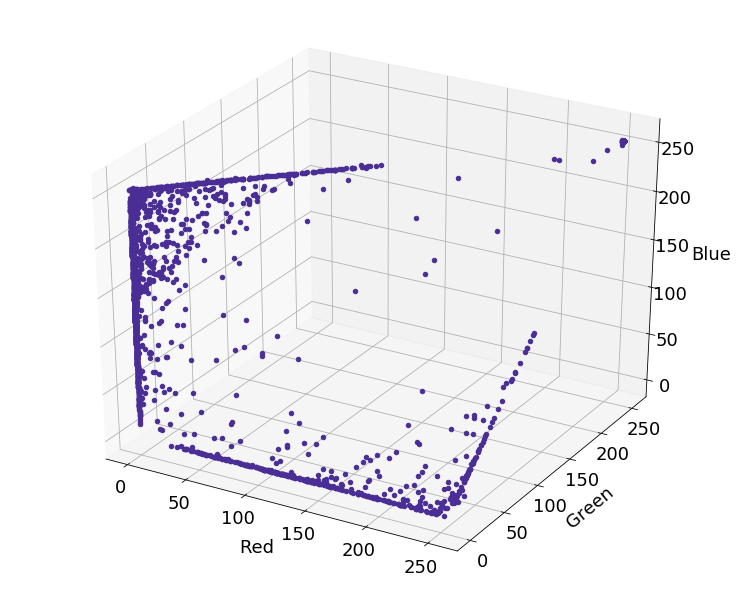

[[ 74  46 150]]


In [76]:
img = 'data/train/homo/007364fd56b31f36321ad4c0e64281bb-1.png'
clusters = 1
dc = DominantColors(img, clusters, 'blue.pdf') 
colors = dc.dominantColors()
dc.plotClusters()
print(colors)

In [ ]:
list(colors[0]).index(max(colors[0]))

In [ ]:
image = imread('data/train-images/homo/0f19f16fc5cbd07025c80a51a30683e6-1.png')
#image = imread('data/train-images/homo/24ba6ce31eb7b9c0191f31cbd0c8c942-5.tga')

In [ ]:
plt.imshow(image)

In [ ]:
sigma = 8
unsharp_strength = 0.8
kernel_size = 10
kernel = np.ones((kernel_size, kernel_size)) / kernel_size
blurred = gaussian_filter(image, sigma=0.8)
convolved = _convolveImage(image - unsharp_strength * blurred, kernel)

In [ ]:
plt.imshow(convolved)

In [ ]:
gray = convolved[:,:,0]
im_bw = _apply_otsu(gray)

In [ ]:
(im_bw == True).any()

In [ ]:
plt.imshow(im_bw)

In [ ]:
im_bw[:,:90] = 0
im_bw[:,-90:] = 0
im_bw[:90,:] = 0
im_bw[-90:,:] = 0

In [ ]:
test_clear = clear_border(im_bw)

In [ ]:
imsave('test.png', img_as_uint(test_clear))

In [ ]:
plt.imshow(test_clear)

In [ ]:
image = imread('data-otsu/train/homo/156ab47c6ef918c17616d304b2b588b9-1homo-0.png')

In [ ]:
plt.imshow(image)

In [ ]:
np.max([region.area for region in regionprops(label(test_clear))])

In [ ]:
def label_regions(image):
    label_image = label(image)
    image_label_overlay = label2rgb(label_image, image=image)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(image_label_overlay)
    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 100:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
    return regionprops(label_image)

In [ ]:
sigma = 8
unsharp_strength = 0.8
kernel_size = 9
kernel = np.ones((kernel_size, kernel_size)) / kernel_size
kernel[0,:]
image = imread('/Users/raymatsumoto/science/keras-phase-sep/data/test-images/homo/5e541ed97dbbd7387dffd5fc29eccd63-3.png')
blurred = gaussian_filter(image, sigma=0.8)
convolved = _convolveImage(image - unsharp_strength * blurred, kernel)
close = closing(convolved, square(3))
gray = convolved[:,:,0]
im_bw = _apply_otsu(gray)

im_labeled, n_labels = label(im_bw, background=0, return_num=True)
im_labeled += 1

im_props = regionprops(im_labeled)
plt.imshow(im_labeled,cmap=plt.cm.gray)
n_regions = _cutoff_particles(im_labeled, im_props, cutoff=50)

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(convolved, cmap=plt.cm.gray)